CROP RECOMMENDATION SYSTEM

Import Libaries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Import Dataset

In [3]:
df=pd.read_csv("Crop_recommendation.csv")

Analyzing the dataset

In [4]:
df.shape

(2200, 8)

In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [16]:
crop=df.describe()

Exploring Data

In [17]:
corr=crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,0.999931,0.999319,0.999011,0.999353,0.998540,0.998163
P,0.999931,1.000000,0.999426,0.999133,0.999442,0.998654,0.998263
K,0.999319,0.999426,1.000000,0.997487,0.997771,0.996852,0.999169
temperature,0.999011,0.999133,0.997487,1.000000,0.999656,0.999926,0.995061
humidity,0.999353,0.999442,0.997771,0.999656,1.000000,0.999306,0.996325
ph,0.998540,0.998654,0.996852,0.999926,0.999306,1.000000,0.993941
rainfall,0.998163,0.998263,0.999169,0.995061,0.996325,0.993941,1.000000


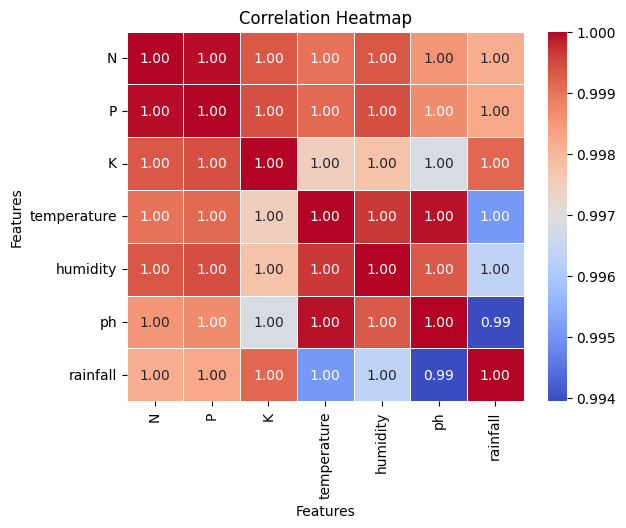

In [18]:
import seaborn as sns
# Create a heatmap using Seaborn
sns.heatmap(corr, annot=True, cbar=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


Encoding the Label column

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
df["label"]=le.fit_transform(df["label"])
encoded_labels = df["label"]

In [48]:
decoded_labels = le.inverse_transform(df["label"])
label_df = pd.DataFrame({'Original Labels': decoded_labels, 'Encoded Labels': encoded_labels})
print(label_df)

     Original Labels  Encoded Labels
0               rice              20
1               rice              20
2               rice              20
3               rice              20
4               rice              20
5               rice              20
6               rice              20
7               rice              20
8               rice              20
9               rice              20
10              rice              20
11              rice              20
12              rice              20
13              rice              20
14              rice              20
15              rice              20
16              rice              20
17              rice              20
18              rice              20
19              rice              20
20              rice              20
21              rice              20
22              rice              20
23              rice              20
24              rice              20
25              rice              20
2

In [15]:
# pd.set_option('display.max_rows', None)
# print(label_df)

Train Test Split

In [14]:
# Assume X is your feature matrix, y is your target variable
x=df[["N",	"P",	"K",	"temperature",	"humidity",	"ph",	"rainfall"]]
y=df["label"]

MinMax Scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
x=scaler.fit_transform(x)

Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Selecting the best model for the dataset

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [21]:
 models=[RandomForestClassifier(n_estimators=20),BernoulliNB(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier(n_neighbors=11)]

In [22]:
for model in models:
    model_name=model.__class__.__name__
    modet_fit=model.fit(x_train,y_train)
    model_accuracy=model.score(x_test,y_test)
    print(f"{model_name} - Accuracy: {model_accuracy:.4f}")

RandomForestClassifier - Accuracy: 0.9909
BernoulliNB - Accuracy: 0.7614
DecisionTreeClassifier - Accuracy: 0.9750
GaussianNB - Accuracy: 0.9909
SVC - Accuracy: 0.9818
KNeighborsClassifier - Accuracy: 0.9568


In [23]:
model=GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)
predicted=model.predict([[60,55	,44,	23.004459,	82.320763	,7.840207,	263.964248]])
predicted_value=le.inverse_transform(predicted)
print(predicted_value)

['pigeonpeas']


Prediction

In [24]:
def recommandation(N,P	,K	,temperature,	humidity,	ph,	rainfall):
    features=np.array([[N,P	,K	,temperature,	humidity,	ph,	rainfall]])
    prediction=model.predict(features)
    return prediction[0]

In [50]:
N=int(input("enter the nitroger"))
P=int(input("enter the phosphorus"))
K=int(input("enter the Potassium"))
temperature=int(input("enter the temperature"))
humidity=int(input("enter the humidity"))
ph=int(input("enter the ph"))
rainfall=int(input("enter the rainfall"))
predict=recommandation(N,P	,K	,temperature,	humidity,	ph,	rainfall)
if predict in label_df['Encoded Labels'].values:
    crop=label_df.loc[label_df['Encoded Labels']==predict,'Original Labels'].values[0]
    print(f"{crop} is the best crop")
else:
    print("sorry we do not able to recommend it")

enter the nitroger 100
enter the phosphorus 100
enter the Potassium 100
enter the temperature 40
enter the humidity 100
enter the ph 7
enter the rainfall 100


coffee is the best crop
